# ML Session 2차시 과제

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
%matplotlib inline

iris = pd.read_csv('Iris.csv')
adv = pd.read_csv('advertising.csv')

### 문제 1 (24점)
#### 1-1. 분류 평가지표 중 '정밀도'와 '재현율'에 대한 개념과 이 둘이 어떤 관계인지 설명해주세요. (6점)

1) 정밀도(precision)

###### -> positive로 예측한 것 중 실제 positive의 비율


2) 재현율(recall)

###### -> 실제 positive인 것들 중, positive로 예측한 비율


##### 임계값 변화시 서로 음의 상관관계를 가진다.

#### 1-2.  '정밀도'와 '재현율'의 관계로 인하여 다른 어떤 평가지표를 쓰는 것이 좋은가요? 그 이유와 함께 설명해주세요. (6점)

 F1-score 지표를 사용한다.

-> 정밀도(precision)과 재현율(recall)을 결합한 지표로,  
정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때  
상대적으로 높은 값을 가진다는 특징을 갖는다.

#### 1-3. 정밀도와 재현율이 각각 더 중요한 사례를 적어주세요. (각 6점)
- 되도록 ppt에 나온 사례 외의 사례를 들어주세요

In [2]:
# 정밀도가 더 중요한 경우(precision)

#ex) 자율주행 사물인식
#여러 데이터를 학습시켜 이런 형태는 사람일 것이다 라고 예측했으나(positive), 사물로 인식한 경우(negative) 자율주행이 그대로 사람을 칠 수도 있는 문제 발생.

In [3]:
#### 재현율이 더 중요한 경우(recall)

#ex) 코로나 여부
#코로나 양성이지만(positive) 코로나를 음성(negative)으로 인식하면 정상으로 판단하여 전염이 더 심각해짐

### 문제2 (40점)
#### 2-1 (20점) 
**Stratified K-fold Cross Validation은 회귀에서는 지원되지 않지만 <font color="#CC3D3D">임의로 범주형 데이터로 쪼개서</font> Stratified K-fold를 사용할 수 있습니다.   
`adv`데이터를 사용하여 Strtifed K-fold를 적용해보세요.**  
- `Sales` 값에 따라 임의로 범주형을 부여합니다.  
- 임의로 부여한 범주형에 따라 Stratifed K-fold를 적용합니다.  
※ 임의로 부여한 범주형과 데이터 갯수를 출력해주세요.

In [4]:
adv['Sales'].describe()

count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

##### 4분위로 통일

In [5]:
adv['Sales']= adv['Sales'].apply(lambda x: 25 if x<11 else 50 if x<16 else 75 if x<19 else 100 )

In [6]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,100
1,44.5,39.3,45.1,25
2,17.2,45.9,69.3,50
3,151.5,41.3,58.5,75
4,180.8,10.8,58.4,75


In [7]:
kfold_adv= StratifiedKFold(n_splits=3)
cnt_iter=0
for train_idx, test_idx in kfold_adv.split(adv, adv['Sales']):
    cnt_iter += 1
    label_train = adv['Sales'].iloc[train_idx]
    label_test = adv['Sales'].iloc[test_idx]

    
    print('** 교차검증: {} **'.format(cnt_iter))
    print('학습 레이블 데이터 분포 : \n' , label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n' , label_test.value_counts())
    print('\n')

** 교차검증: 1 **
학습 레이블 데이터 분포 : 
 100    34
50     34
75     33
25     32
Name: Sales, dtype: int64
검증 레이블 데이터 분포 : 
 100    17
75     17
25     17
50     16
Name: Sales, dtype: int64


** 교차검증: 2 **
학습 레이블 데이터 분포 : 
 100    34
75     33
50     33
25     33
Name: Sales, dtype: int64
검증 레이블 데이터 분포 : 
 100    17
75     17
50     17
25     16
Name: Sales, dtype: int64


** 교차검증: 3 **
학습 레이블 데이터 분포 : 
 100    34
75     34
50     33
25     33
Name: Sales, dtype: int64
검증 레이블 데이터 분포 : 
 100    17
50     17
75     16
25     16
Name: Sales, dtype: int64




#### 2-2 (20점)
- 2-1에서 사용한 Stratified K-fold를 적용하세요.  
- DecisionTreeRegressor를 사용하세요.  <font color="#CC3D3D">(Hint! for문 안에 사용)</font>   
- 각 fold별로 MAE와 MAPE를 출력하세요.<font color="#CC3D3D">(Hint! for문 안에 사용)</font>   
- 각 fold의 성능을 평균내어 모델의 MAE와 MAPE를 출력하세요.<font color="#CC3D3D">(Hint! 각 fold의 지표를 담을 빈 리스트 생성)</font>

#### Stratified K-fold 적용

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
X = adv.iloc[:,:-1] #Sales 제외한 data
y = adv['Sales']

In [10]:
#cross_val_score 사용
model = DecisionTreeClassifier()
scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = 3)
print('교차 검증별 정확도 :', np.round(scores, 4))
print('교차 검증 평균 :', np.round(np.mean(scores), 4))

교차 검증별 정확도 : [0.806  0.7761 0.7727]
교차 검증 평균 : 0.7849


#### DecisionTreeRegressor, MAE 및 MAPE

In [11]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,100
1,44.5,39.3,45.1,25
2,17.2,45.9,69.3,50
3,151.5,41.3,58.5,75
4,180.8,10.8,58.4,75


In [12]:
from sklearn.metrics import mean_absolute_error

X = adv.iloc[:,:-1] #Sales 제외한 data
y = adv['Sales']

#DecisionTreeRegressor() 모델 사용
model = DecisionTreeRegressor()

#3개의 폴더로
skfold= StratifiedKFold(n_splits=3)
n_iter=0
#빈 list 생성
MAE_lst=[]
MAPE_lst=[]


#MAPE 함수 생성
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100


#split으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
for train_index, test_index in skfold.split(X, y):
    X_train, X_test= X.iloc[train_index],X.iloc[test_index]
    y_train, y_test= y.iloc[train_index],y.iloc[test_index]

    #학습 및 예측
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    #반복 시마다 mae와 mape 측정
    n_iter+=1
    mae= mean_absolute_error(y_test, pred)
    mape= MAPE(y_test, pred) #제작한 함수 적용
    
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    
    #빈 list 안에 결과값 append
    MAE_lst.append(mae)
    MAPE_lst.append(mape)
    print('\n{0} mae,mape:{1}, 학습 데이터 크기:{2}, 검증 데이터 크기:{3}'.
          format(n_iter,mae,mape,train_size,test_size))
    print('#{0}검증 세트 인덱스:{1}'.format(n_iter, test_index))
    


#교차 검증별 정확도 및 평균 정확도 계산
print('\n## MAE 평균:', np.mean(MAE_lst))
print('## MAPE 평균:', np.mean(MAPE_lst))    


1 mae,mape:5.223880597014926, 학습 데이터 크기:11.069651741293532, 검증 데이터 크기:133
#1검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 63 64 68 72 75 76]

2 mae,mape:5.223880597014926, 학습 데이터 크기:10.44776119402985, 검증 데이터 크기:133
#2검증 세트 인덱스:[ 61  62  65  66  67  69  70  71  73  74  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 117 119 121 122 124 125
 126 129 130 131 132 134 136 138 140 146 150 152 153]

3 mae,mape:5.681818181818182, 학습 데이터 크기:14.14141414141414, 검증 데이터 크기:134
#3검증 세트 인덱스:[115 116 118 120 123 127 128 133 135 137 139 141 142 143 144 145 147 148
 149 151 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198

### 문제 3 (12점, 각 6점)
#### 3-1) 
**<font color="#CC3D3D">"보험 사기 적발 모델"</font>은 <font color="#CC3D3D">금융 사기 거래인지, 정상  거래인지 판단하는 모델</font>입니다.   
해당 모델의 평가지표로 어떤 평가지표가 사용되는 것이 좋을까요?   
평가지표와 그 이유를 작성해주세요.**

In [13]:
#재현율(recall)

#회사 입장에서 생각해봤을 때, 실제로 보험사기건(positive)인데 정상건(negative)로 인식하게 되면 회사에 미치는 손실이 커짐.

#### 3-2)
암 예측 모델에서는 실제 암환자(Positive)를 일반인(Negative)라고 판단할 경우 업무상 큰 영향이 있기 때문에 재현율(Recall)을 평가지표로 사용하는 것이 바람직합니다.
  
  
**임계값을 낮추면 재현율을 높일 수 있는데요. <font color="#CC3D3D">임계값을 낮추어 재현율을 높이는 것은 바람직하지 않습니다.</font>  
해당 모델의 경우 왜 바람직하지 않은지 작성해주세요.**

In [14]:
# 예측한 결과 중 실제로 positive인 경우.

# 임계값보다 높은 애들은 양성, 낮은 애들은 음성. -> 임계값을 낮추다 -> 양성으로 판단하는 경우가 많아진다. 
# -> 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어든다. -> 임계값을 낮추면 음성도 양성으로 판단하게 됨 -> 환자의 부담과 불평이 커지게 됨.
#-> 검사를 다시 받아야된다던지 등? 


# 임계값을 낮춘다는 것은 양성으로 판단하는 경우가 많아진다는 뜻임. 상호보완적인 임계값 범위를 넘어 낮추면,
# 실제 음성(negative)를 양성(positive)으로 판단하게 된다는 뜻을 말한다.
# 그렇게 되면 환자는 검사를 다시 받아봐야하는 결과가 초래함.

### 문제 4 (12점)
#### confusion_matrix의 TN, FP, FN, TP를 사용하여 accuracy(정확도), precision(정밀도), recall(재현율)을 구하는 함수를 만들어주세요.

In [15]:
iris = iris[iris['Species'] != "Iris-virginica"]

X = iris.iloc[:,:-1]
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

model = DecisionTreeClassifier(max_depth=1, max_features=1, max_leaf_nodes=2, random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[ 2,  6],
       [ 0, 12]], dtype=int64)

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print('tn, fp, fn, tp :', tn, fp, fn, tp)

tn, fp, fn, tp : 2 6 0 12


In [18]:
def accuracy(): #정확도
    acc= (tp+tn)/(tp+fn+fp+tn)
    return acc

def precision(): # 정밀도
    pre= (tp)/(tp+fp)
    return pre

def recall(): #재현율
    rec= (tp)/(tp+fn)
    return rec 

In [20]:
print(accuracy())
print(precision())
print(recall())

0.7
0.6666666666666666
1.0


### 문제 5 (12점, 각 6점)
#### 배우지 않은 회귀 평가지표 2가지 이상을 찾아 <font color="#CC3D3D">평가지표명, 수식, 장단점, 한계</font>등 평가지표에 대한 설명을 작성해주세요.

In [21]:
from IPython.display import Image

https://velog.io/@dlskawns/Linear-Regression-%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EC%9D%98-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-MAE-MSE-RMSE-R-Squared-%EC%A0%95%EB%A6%AC

https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-17-%ED%9A%8C%EA%B7%80-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C

#### 1) R^2(R Squared Score) 결정계수  
-> 분산 기반으로 예측 성능을 평가함.  
결정계수는 실제 관측값의 분산대비 예측값의 분산을 계산하여 데이터 예측의 정확도 성능을 측정하는 지표.  
0~1까지 수로 나타내어지며 1에 가까울수록 100%의 설명력을 가진 모델이라고 평가를 하게된다.

: 중심극한정리에 의해 표본 데이터가 많을수록 정확도 또한 올라감.  
: 하지만 다중선형회귀에서 특성이 많이 늘어나면 R^2이 오르는 경향이 발생. 따라서 맹신은 하지 않도록 해야한다

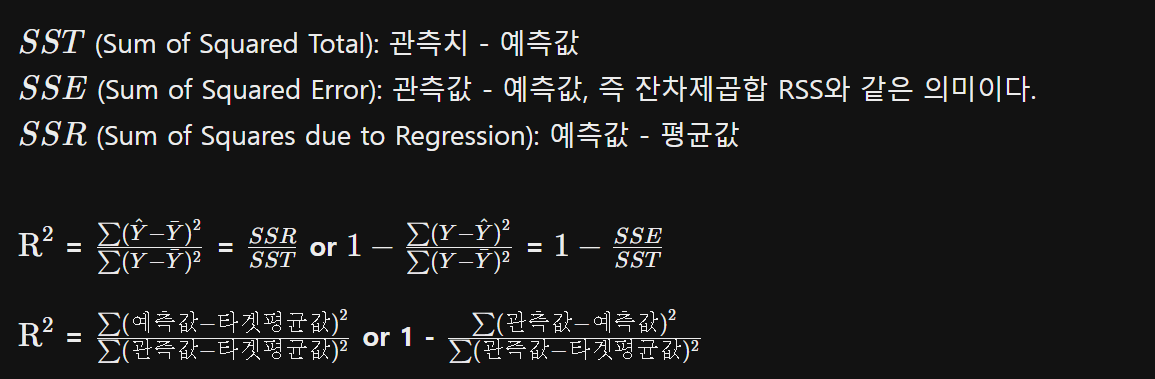

In [22]:
Image("image/2.png")

#### 2)  MSLE(MEan Squared Log Error)

-> MSE에 로그를 적용해준 지표.(MSE란 실제값과 예측값의 차이를 제곱해 평균한 것)

:데이터 간 편차를 줄임. 왜도와 첨도를 줄여 데이터 분석 시 의미있는 결과를 도출하기 위함. -> 정규성이 높아진다. (ex) 단위 통일)


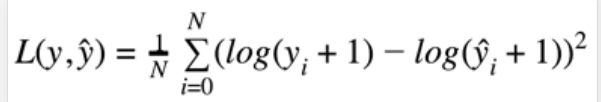

In [23]:
Image("image/3.png")

#### 3) RMSLE(Root Mean Squared Log Error)

-> 아웃라이어에 덜 민감(root 씌워줌으로써 이상치가 있더라도 변동폭이 크지 않음.  
-> under estimation에 큰 패널티 부여. ex) 도착 예정시간 30분 but 실제 40분에 도착했을 때 느끼는 분노 개념 정도



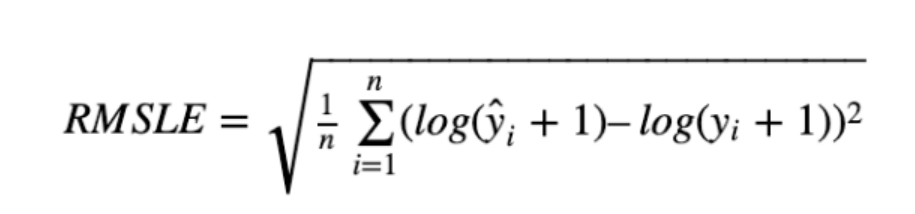

In [24]:
Image("image/4.png")